<a href="https://colab.research.google.com/github/ricardo639/Red-Neurona-TC/blob/main/REDES_NEUNORALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pylab as plt
from matplotlib import rc

sns.set(style="whitegrid", palette="muted", font_scale=1.05)

rcParams["figure.figsize"] = 16,5

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

tf.random.set_seed(RANDOM_SEED)

In [ ]:
df = pd.read_csv("DEXMXUS (1).csv")
#df.head(50) ## leer los primero 50 datos

In [ ]:
df["DEXMXUS"] = pd.to_numeric(df["DEXMXUS"],errors="coerce")## coerce fijara a los valores no valides como NaN
df["DATE"] =pd.to_datetime(df["DATE"])
df.index=df["DATE"]

In [ ]:
print(df.dtypes)

DATE       datetime64[ns]
DEXMXUS           float64
dtype: object


array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

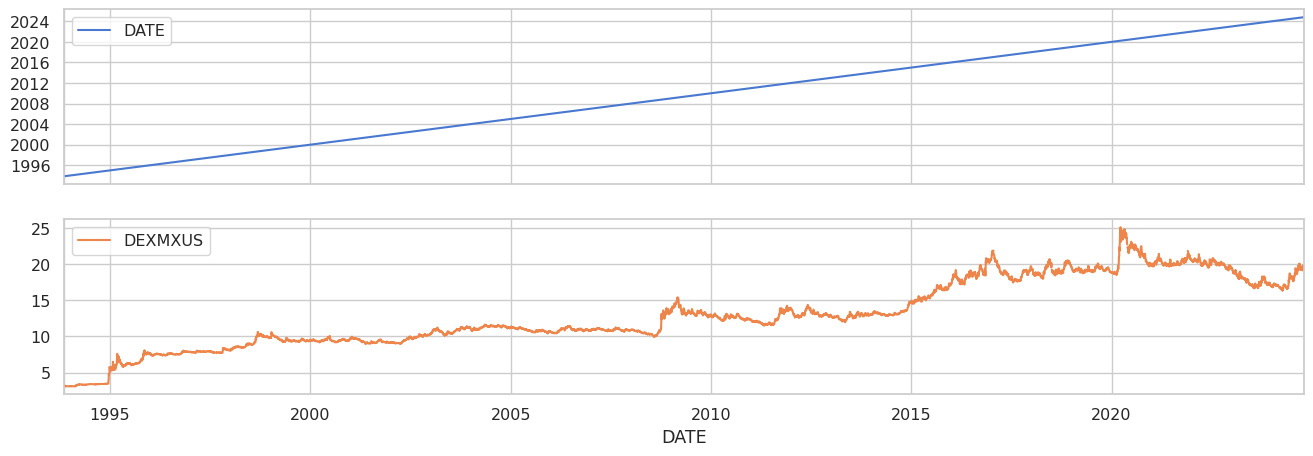

In [ ]:
df.plot(subplots=True)

In [ ]:
df.index=df["DATE"]


In [ ]:
features= df["DEXMXUS"]
features=features.to_frame()
features.head(15)

,DEXMXUS
DATE,
1993-11-08,3.1520
1993-11-09,3.2400
1993-11-10,3.2400
1993-11-11,NaN
1993-11-12,3.2400
1993-11-15,3.2150
1993-11-16,NaN
1993-11-17,NaN
1993-11-18,3.1080


In [ ]:
features=features.dropna()
features.head(15)

,DEXMXUS
DATE,
1993-11-08,3.1520
1993-11-09,3.2400
1993-11-10,3.2400
1993-11-12,3.2400
1993-11-15,3.2150
1993-11-18,3.1080
1993-11-19,3.1150
1993-11-22,3.1022
1993-11-23,3.1026


In [ ]:
train_size=int(len(features)*0.8)
test_size=len(features)-train_size
train, test= features[0:train_size], features[train_size:len(features)]
print(len(train),len(test))

6208 1552


Vamos a crear una funcion que permita salvar las ventanas temporales

In [ ]:
#Usaremos time_step para el tamalo de la ventana temporal
def create_dataset(X,y,time_steps=1):
  Xs,ys=[],[] #Las declaramos como listas vacías donde se almacenaran las
                   #listas de las ventanas temporales
  for i in range(len(X)-time_steps):
    v=X.iloc[i:(i + time_steps)].values
    Xs.append(v)  #append: finaliza la lista
    ys.append(y.iloc[i + time_steps])  #append: finaliza la lista
  return np.array(Xs), np.array(ys)

crea un arreglo de listas de ventanas de tamaño 20


In [ ]:
time_steps=20
X_train,y_train=create_dataset(train,train["DEXMXUS"],time_steps)
X_test,y_test=create_dataset(test,test["DEXMXUS"],time_steps)

Definimos la red neuronal

Definimos el proceso de modelaje y a la red resultado se manda modelo
existe otras definidas con memorias a largo plazo


In [ ]:
#Red multicapa o de capas apiladas
model=keras.Sequential()
#Apilamos la capa densa o totalmente conectada a una sola red neuronal (salida)
model.add(keras.layers.LSTM(64,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(keras.layers.Dense(1))
#Compilamos la red con un hyperparámetro, es decir una función de pérdida, optimzador, razón de aprendizaje, etc
#"mae" MeanAbsoluteError class: Calcula la media de la diferencia absoluta entre etiquetas y predicciones.
#                               loss = abs(y_true - y_pred)
model.compile(loss="mae",optimizer=keras.optimizers.RMSprop(clipvalue=1.0))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history=model.fit(
    X_train,
    y_train,
    epochs=120, #hiperparámetro que define el número de veces que el algoritmo
               #de aprendizaje funcionará en todo el conjunto de datos de entrenamiento.
    batch_size=32, #lotes de agrupamiento
    verbose=1, #Datos del proceso en pantalla
    validation_split=0.01,
    shuffle=False
)

Epoch 1/120
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.7672 - val_loss: 4.3104
Epoch 2/120
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.7969 - val_loss: 2.3396
Epoch 3/120
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.6782 - val_loss: 1.5064
Epoch 4/120
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5940 - val_loss: 1.0159
Epoch 5/120
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.5278 - val_loss: 0.9805
Epoch 6/120
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4239 - val_loss: 0.9339
Epoch 7/120
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3877 - val_loss: 0.6847
Epoch 8/120
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3921 - val_loss: 0.6383
Epoch 9/120
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3683 - val_loss: 0.5164
Epoch 10/120
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3381 - val_loss: 0.6021
Epoch 11/120
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3130 - val_loss: 0.5770
Epoch 12/120
192/192 ━━━━━━━━━

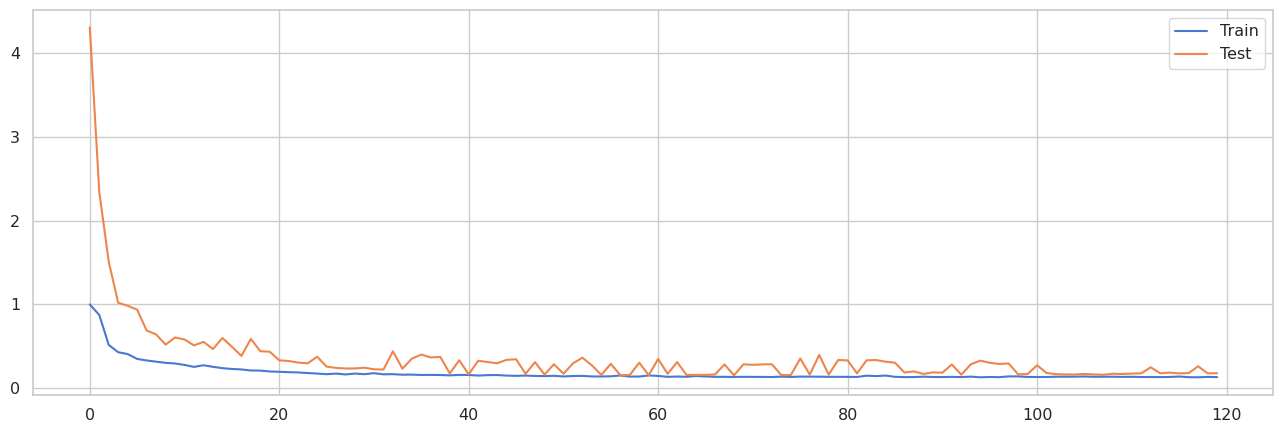

In [ ]:
plt.plot(history.history["loss"],label="Train")
plt.plot(history.history["val_loss"],label="Test")
plt.legend()

In [ ]:
y_pred=model.predict(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


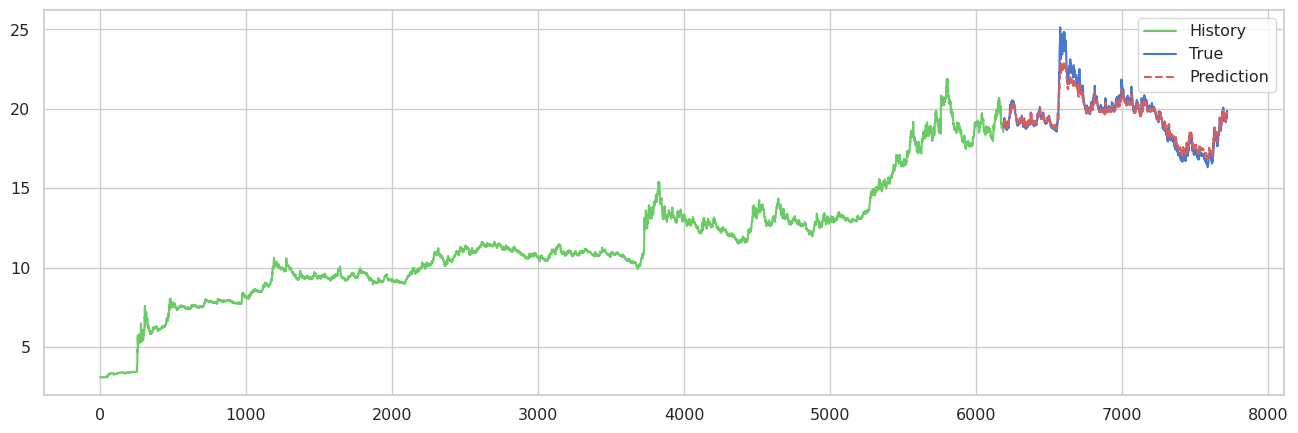

In [ ]:
plt.plot(np.arange(0,len(y_train)),y_train,"g",label="History")
plt.plot(np.arange(len(y_train),len(y_train)+len(y_test)),y_test,label="True")
plt.plot(np.arange(len(y_train),len(y_train)+len(y_test)),y_pred,"r--",label="Prediction")
plt.legend()

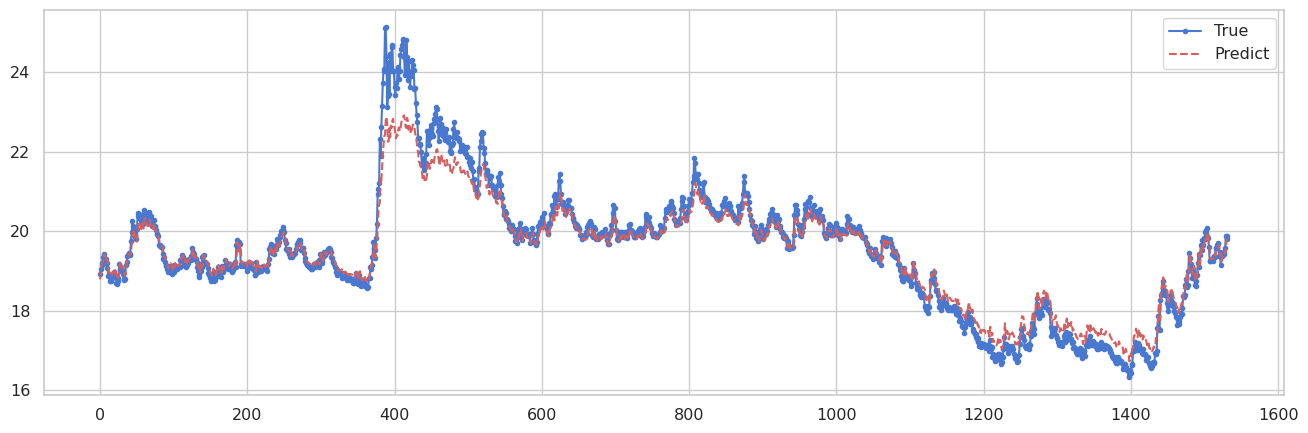

In [ ]:
plt.plot(y_test,marker=".",label="True")
plt.plot(y_pred,"r--",label="Predict")
plt.legend()

In [ ]:
from keras.models import model_from_json
model.save("Tipo_cambio_octubre2024.h5")